# Diabetes Detection System (Females)

## Importing necessary libraries

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn import svm
from sklearn.metrics import accuracy_score
import pickle
import os
from joblib import dump

## Loading the dataset

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective is to predict based on diagnostic measurements whether a patient has diabetes.

 1. Pregnancies: Number of times pregnant (int64)

 2. Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test (int64)

 3. BloodPressure: Diastolic blood pressure (mm Hg) (int64)

 4. SkinThickness: Triceps skinfold thickness (mm) (int64)

 5. Insulin: 2-Hour serum insulin (mu U/ml) (int64)

 6. BMI: Body mass index (weight in kg/(height in m)^2) (float64)

 7. DiabetesPedigreeFunction: Diabetes pedigree function (float64)

 8. Age: Age (years) (int64)
 
 9. Outcome: Class variable (0 or 1) where 1 denotes diabetes and 0 denotes no diabetes (int64)

In [32]:
data = pd.read_csv('D:\multi-disease\dataset\diabetes.csv')

In [33]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [34]:
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [35]:
data.shape

(768, 9)

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [37]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


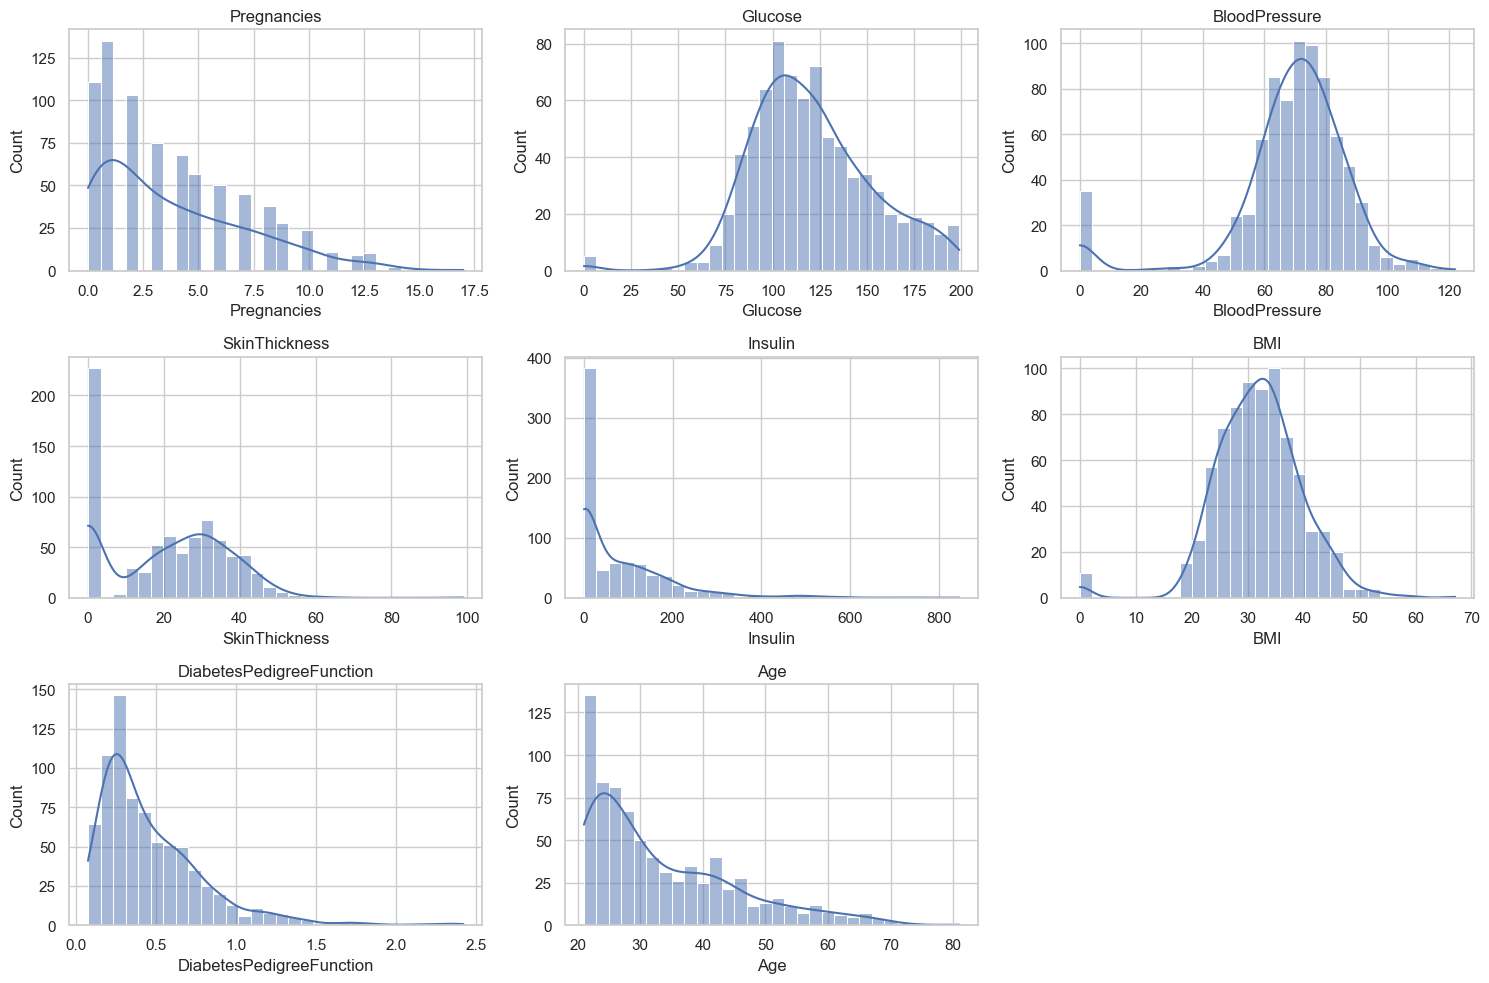

In [38]:
# Setting the aesthetics for the plots
sns.set(style="whitegrid")

# Creating histograms for each feature
features = data.columns[:-1]  # Excluding the 'Outcome' column
plt.figure(figsize=(15, 10))

for i, feature in enumerate(features):
    plt.subplot(3, 3, i + 1)
    sns.histplot(data[feature], kde=True, bins=30)
    plt.title(feature)

plt.tight_layout()
plt.show()

## Insights

1. Data is not up to the mark and is quite corrupted.

2. For columns Glucose, BloodPressure, SkinThickness, Insulin, BMI  have certain data points are zero.

3. Data is needed to be cleaned.

## EDA

In [39]:
# Replacing the column that have o as data points with median 
data['Glucose'] = data['Glucose'].replace(0, data['Glucose'].median())
data['BloodPressure'] = data['BloodPressure'].replace(0, data['BloodPressure'].median())
data['SkinThickness'] = data['SkinThickness'].replace(0, data['SkinThickness'].median())
data['Insulin'] = data['Insulin'].replace(0, data['Insulin'].median())
data['BMI'] = data['BMI'].replace(0, data['BMI'].median())

In [40]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,121.656250,30.438286,44.000,99.75000,117.0000,140.25000,199.00
BloodPressure,768.0,72.386719,12.096642,24.000,64.00000,72.0000,80.00000,122.00
SkinThickness,768.0,27.334635,9.229014,7.000,23.00000,23.0000,32.00000,99.00
Insulin,768.0,94.652344,105.547598,14.000,30.50000,31.2500,127.25000,846.00
BMI,768.0,32.450911,6.875366,18.200,27.50000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


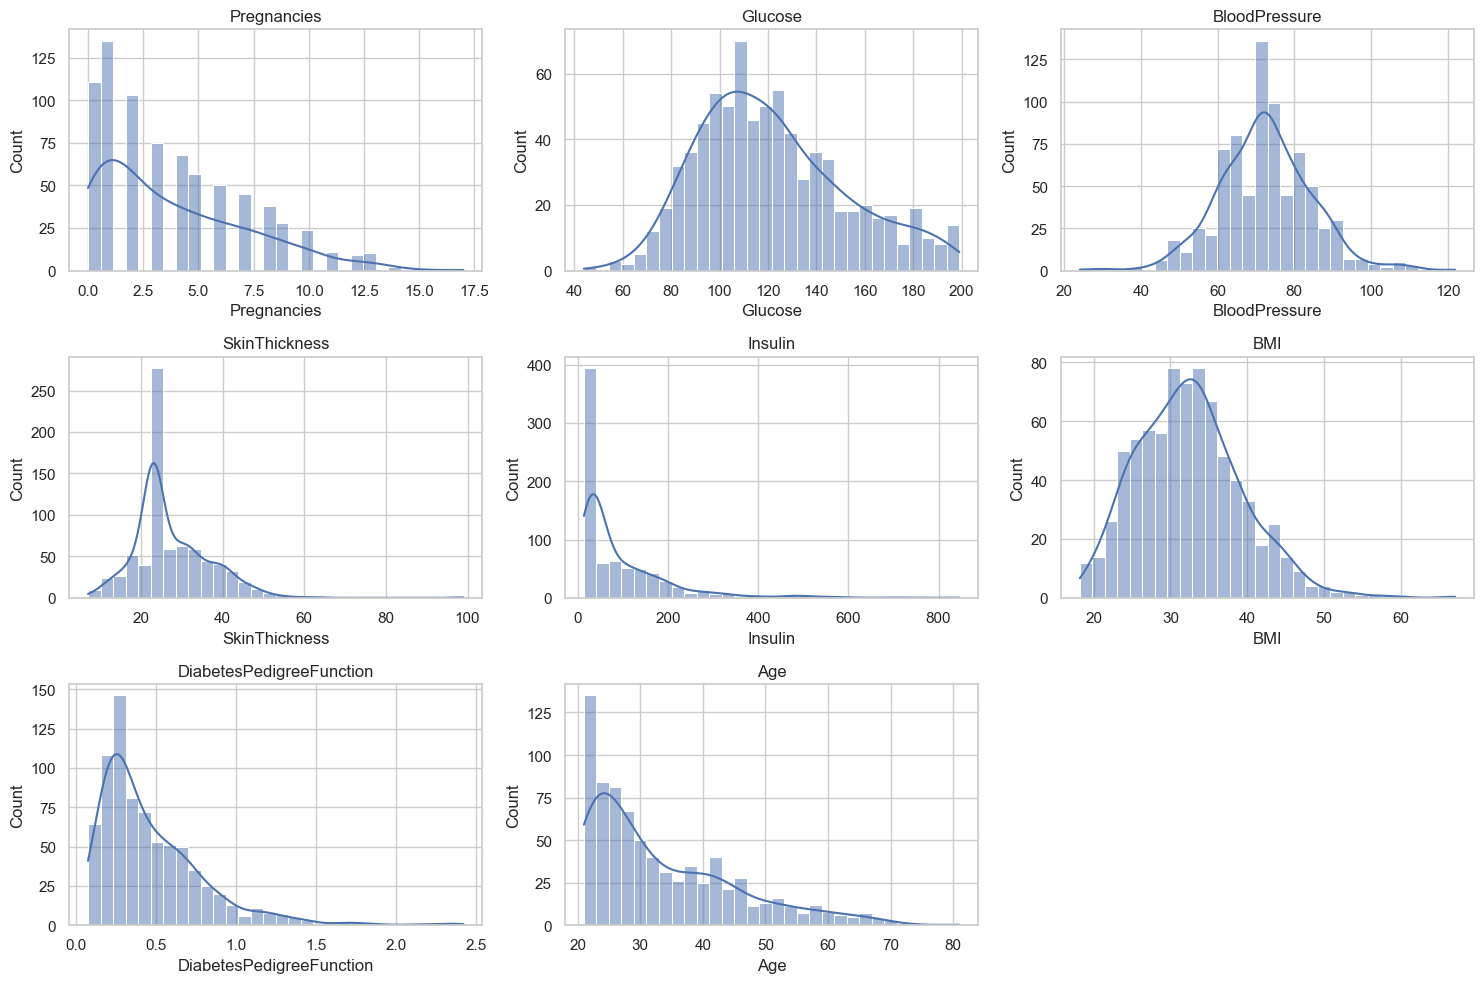

In [41]:
# Setting the aesthetics for the plots
sns.set(style="whitegrid")

# Creating histograms for each feature
features = data.columns[:-1]  # Excluding the 'Outcome' column
plt.figure(figsize=(15, 10))

for i, feature in enumerate(features):
    plt.subplot(3, 3, i + 1)
    sns.histplot(data[feature], kde=True, bins=30)
    plt.title(feature)

plt.tight_layout()
plt.show()

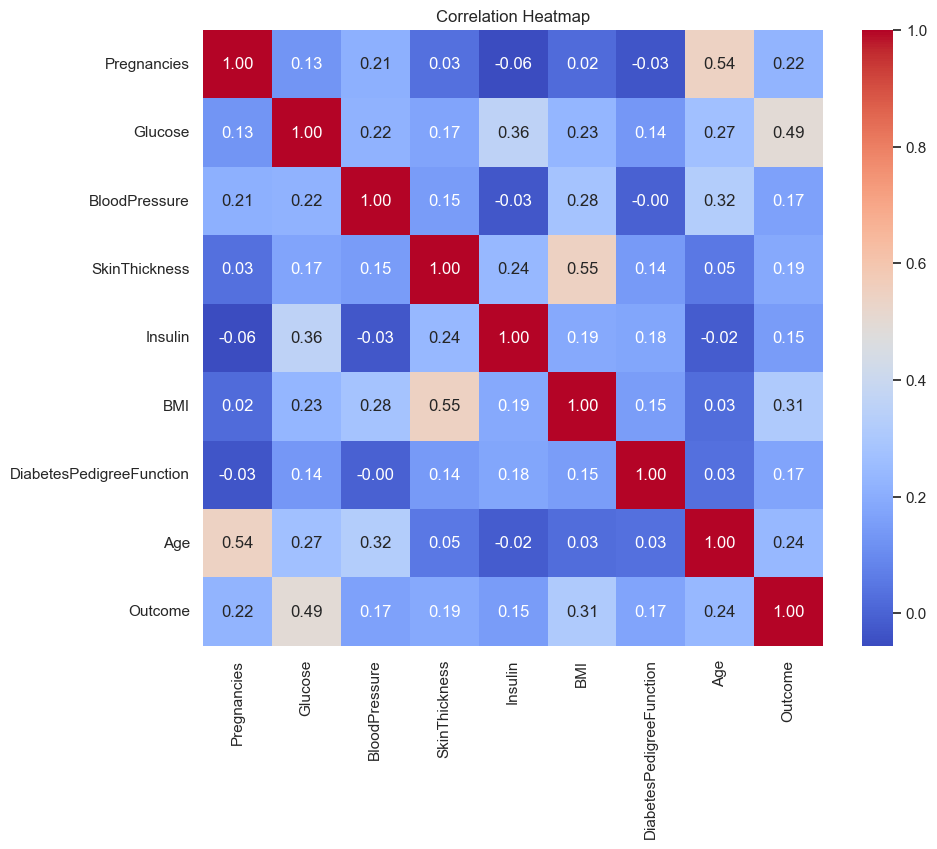

In [42]:
# Creating a correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


## Feature Engineering

In [43]:
data.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [44]:
data.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,110.682000,70.920000,26.058000,83.188000,30.880200,0.429734,31.190000
1,4.865672,142.130597,75.123134,29.716418,116.041045,35.381343,0.550500,37.067164


## Spitting the data for training and testing

In [45]:
x = data.drop('Outcome', axis=1)
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,30.5,33.6,0.627,50
1,1,85,66,29,30.5,26.6,0.351,31
2,8,183,64,23,30.5,23.3,0.672,32
3,1,89,66,23,94.0,28.1,0.167,21
4,0,137,40,35,168.0,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180.0,32.9,0.171,63
764,2,122,70,27,30.5,36.8,0.340,27
765,5,121,72,23,112.0,26.2,0.245,30
766,1,126,60,23,30.5,30.1,0.349,47


In [46]:
y = data['Outcome']
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

### Data standardization

In [ ]:
scaler = StandardScaler()
scaler.fit(x)

StandardScaler()

In [ ]:
standardized_data = scaler.transform(x)
print(standardized_data)

[[ 0.63994726  0.86604475 -0.03198993 ...  0.16724016  0.46849198
   1.4259954 ]
 [-0.84488505 -1.20506583 -0.5283186  ... -0.85155088 -0.36506078
  -0.19067191]
 [ 1.23388019  2.01666174 -0.69376149 ... -1.33183808  0.60439732
  -0.10558415]
 ...
 [ 0.3429808  -0.02157407 -0.03198993 ... -0.90976751 -0.68519336
  -0.27575966]
 [-0.84488505  0.14279979 -1.02464727 ... -0.34215536 -0.37110101
   1.17073215]
 [-0.84488505 -0.94206766 -0.19743282 ... -0.29849289 -0.47378505
  -0.87137393]]


In [ ]:
x = standardized_data

## Splitting the data for traning

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2, stratify=y)

In [ ]:
# print the shapes
print('X shape', x.shape)
print('x_train shape', x_train.shape)
print('x_test shape', x_test.shape)
print('y_train shape', y_train.shape)
print('y_test shape', y_test.shape)

X shape (768, 8)
x_train shape (614, 8)
x_test shape (154, 8)
y_train shape (614,)
y_test shape (154,)


## Training the model with linear kernel

In [ ]:
classifier = svm.SVC(kernel='linear')

In [ ]:
classifier.fit(x_train, y_train)

SVC(kernel='linear')

### Accuracy score

In [ ]:
x_train_pred = classifier.predict(x_train)
training_data_accuracy = accuracy_score(x_train_pred, y_train)
print('Accuracy of training data: ', training_data_accuracy)

Accuracy of training data:  0.7801302931596091


In [ ]:
x_test_pred = classifier.predict(x_test)
test_data_accuracy = accuracy_score(x_test_pred, y_test)
print('Accuracy of test data: ', test_data_accuracy)

Accuracy of test data:  0.7727272727272727


In [ ]:
input_data = (5,166,72,19,175,25.8,0.587,51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = classifier.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[[ 0.3429808   1.45779063 -0.03198993 -0.90367905  0.76174179 -0.96798414
   0.34768723  1.51108316]]
[1]
The person is diabetic


c:\Users\Mayank\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Saving the trained model

In [ ]:
# filename = 'diabetes.sav'
# pickle.dump(classifier, open(filename,'wb'))